# PROGETTO DI MACHINE LEARNING

### Introduzione 


In questo progetto andrò ad analizzare il dataset "diabetes" messo a disposizione da sklearn.   
Nello specifico andrò ad addestrare un modello di machine learning in grado di prevedere ,tramite la regressione , il progredire della malattia dopo 1 anno a partire da 10 variabili misurate su 442 pazienti e ne valuterò la performance.

### Variabili :


- age =     età dei pazienti 
- sex =  sesso dei pazienti 
- bmi =    indice di massa corporea 
- bp  =   pressione media del sangue 
- tc  =   colesterolo sierico  totale 
-ldl  =   lipoproteine a bassa densità
-hdl  =   lipoproteine ad alta densità
-thc  =  colesterolo totale  / HDL
-ltg  =   livello trigliceridi 
-glu  =   livello di zuccheri nel sangue 

### Librerie 

In [2]:
#come prima cosa importo le librerie necessarie 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [3]:
#tramite sklearn carico il dataset che andrò ad analizzare 
from sklearn import datasets
diabetes = datasets.load_diabetes()

### Analisi del dataset 

In [4]:
#do una prima occhiata a come è fatto il dataset 
print (diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# notare che le varaibili sono già state standardizzate 

In [6]:
#divido i dati tra le variabili predittive e il target li trasformo in un dataframe di pandas 
X = diabetes["data"]
y = diabetes["target"]
print(X.shape,y.shape)
# trasformo il dataset in un dataframe di pandas rinomimano le colonne per praticità 
df_X = pd.DataFrame(X, columns =["age","sex"," bmi","blood_p","tc","ldl","hdl","tch","ltg","glu"])
df_X.head()

(442, 10) (442,)


,age,sex,bmi,blood_p,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
df_y = pd.DataFrame(y, columns =["disease progression"])
print(df_y)


     disease progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [11]:
#riunisco il df così da poter avere una visione per intero dei dati 
df = pd.merge(df_X,df_y, left_index=True , right_index=True)
df.head()

,age,sex,bmi,blood_p,tc,ldl,hdl,tch,ltg,glu,disease progression_x,disease progression_y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,135.0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-1.444295e-18,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,2.543215e-18,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.255925e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
blood_p,442.0,-4.854086e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
tc,442.0,-1.428596e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
ldl,442.0,3.898811e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
hdl,442.0,-6.028360e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
tch,442.0,-1.788100e-17,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
ltg,442.0,9.243486e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
glu,442.0,1.351770e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


<AxesSubplot:title={'center':'CORRELATION HEATMAP'}>

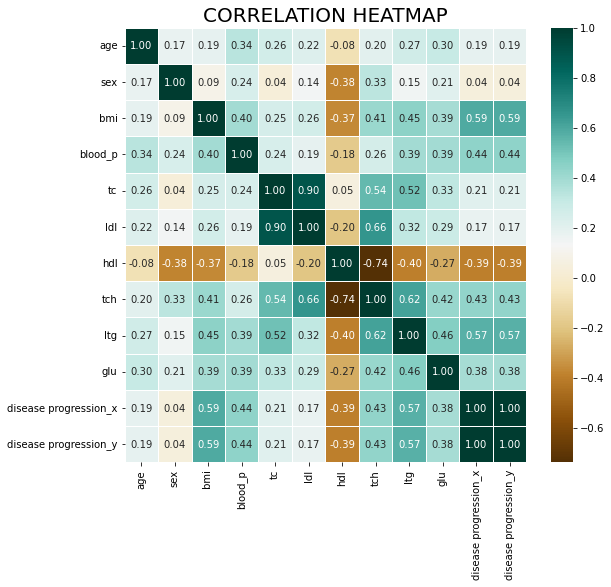

In [13]:
#studio quale delle vabiabili  hanno una maggiore correlazione con la variabile Y(target)
plt.figure(figsize=(9,8))
plt.title("CORRELATION HEATMAP",fontsize=20)
sns.heatmap(data=df.corr(),cmap="BrBG",annot=True,  fmt=".2f",linewidths=1)

possiamo trarne alcune informazioni :

- le variabili che più sembrano incidere sul progredire della malattia sono l'indice di massa corporea e il livello di       trigliceridi (ltg)
- sesso ed età dei pazienti invece sembrano essere poco rilevanti 


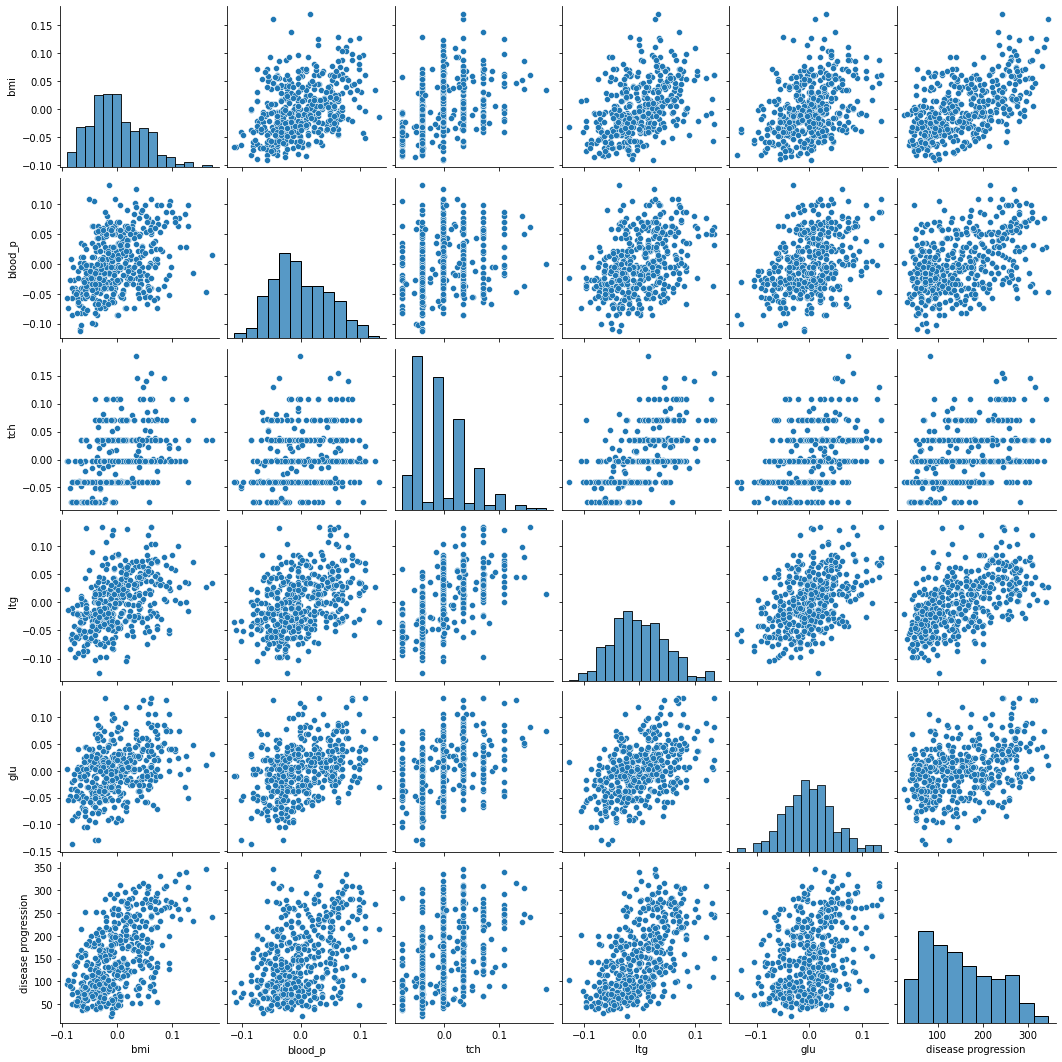

In [10]:
#prendo le variabili con una maggiore correlazione rispetto a df_y e inizio ad osservare i dati tramite il grafico
fig1 = sns.pairplot(df[[" bmi","blood_p","tch","ltg","glu","disease progression"]])
plt.show()

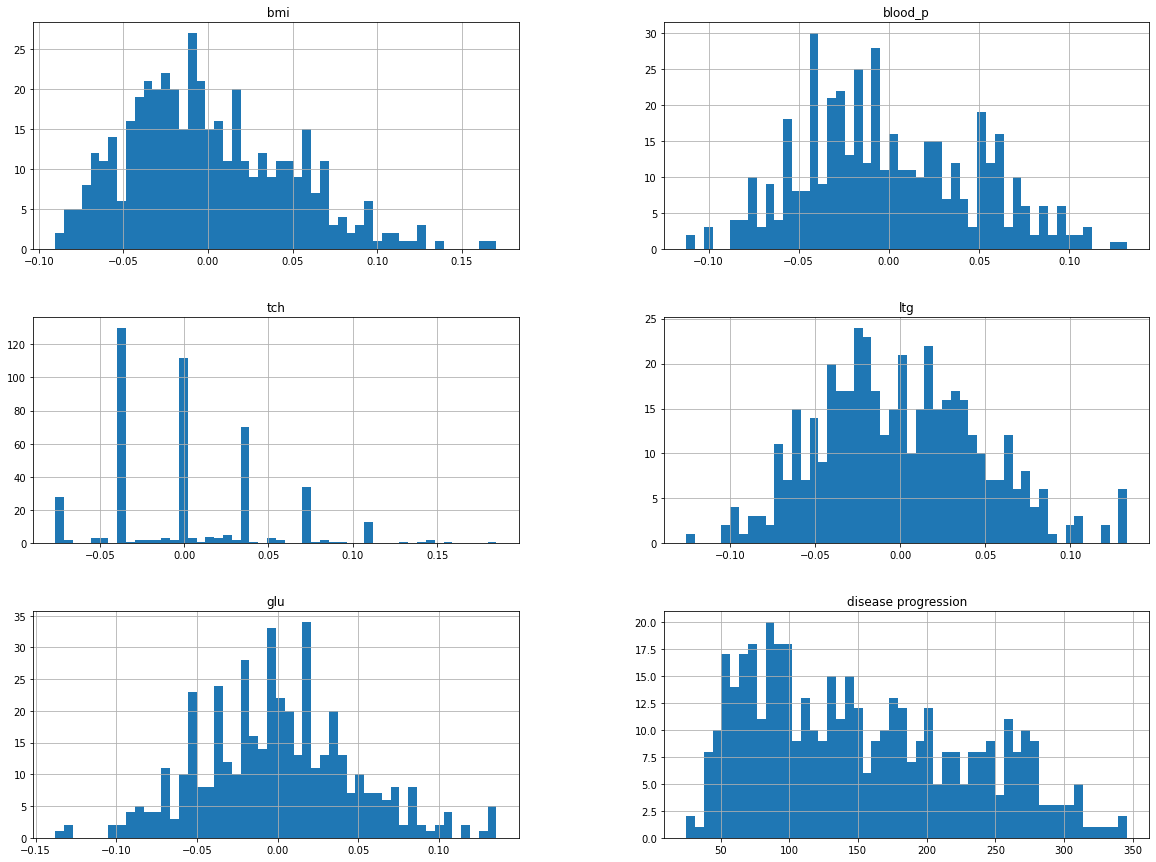

In [11]:
 fig2 = df.hist([" bmi","blood_p","tch","ltg","glu","disease progression"], bins=50, figsize=(20, 15))

In [12]:
# controllo che il dataset non ha valori nulli o mancanti 
df.isnull().sum()


age                    0
sex                    0
 bmi                   0
blood_p                0
tc                     0
ldl                    0
hdl                    0
tch                    0
ltg                    0
glu                    0
disease progression    0
dtype: int64

In [13]:
df.isna().sum()

age                    0
sex                    0
 bmi                   0
blood_p                0
tc                     0
ldl                    0
hdl                    0
tch                    0
ltg                    0
glu                    0
disease progression    0
dtype: int64

###  Modelli di regressione 

In [16]:
# tramite sklearn importo alcuni modelli di regressione 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [17]:
models = []

models.append(('LR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RG', Ridge()))
models.append(('LS', Lasso()))
models.append(('RF', RandomForestRegressor()))


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [19]:
#divido il df in df di addestramento e df di test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [20]:
#controllo sempre quale sia il modello che performa meglio sul set di dati  tramite la cross_validation 
names = []
scores = []

sklearn.metrics.get_scorer_names()
for name, model in models:   
    kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='r2').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0   LR  0.473595
1  KNR  0.352651
2   DT -0.132048
3  SVR  0.168780
4   RG  0.422546
5   LS  0.341293
6   RF  0.389569


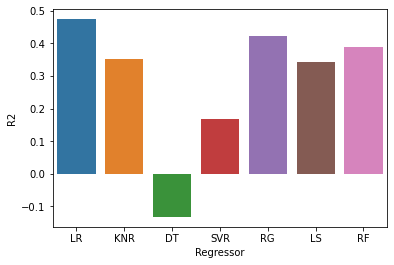

In [21]:
#per leggere ancora meglio i dati li rappresento tramite grafico 
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Regressor', ylabel='R2')
plt.show()

In questo caso vediamo come la regressione lineare sembra essere  il modello più performante per il nostro dataset ma per poter convalidare almeno un iperparametro come richiesto per il progetto utilizzeremo un modello di Random Forest.

### RANDOM FOREST 

In [22]:
from sklearn.model_selection import GridSearchCV

# tramite GridSearchCV capisco quali sono i parametri migliori per adattare meglio il modello al dataset 
#(tutti gli altri parametri non ottimizzati saranno scelti di default)
rf= RandomForestRegressor(random_state=1, bootstrap= True,)
param_grid = { 
   'n_estimators': [10, 20, 80],
   'max_features': ['sqrt', 'log2', None],
   'max_depth' : [4,5,6,8],
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
CV_rf.best_params_


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

In [25]:
best_rf = CV_rf
yp_test = best_rf.predict(X_test)
#una volta selezionati i prametri predico X_test con il nuovo modello e confronto i risultati reali con quelli che
#il mio modello ha predetto 


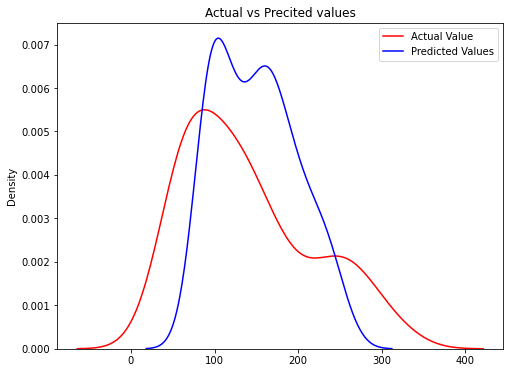

In [26]:
plt.figure(figsize=(8,6))

ax = sns.kdeplot(y_test, color="r", label="Actual Value") #valori reali
sns.kdeplot(yp_test, color="b", label="Predicted Values", ax=ax) #valori predetti

plt.title('Actual vs Precited values')
plt.legend()
plt.show()

### Metriche di valutazione del modello

valutiamo inizialmente il modello su i dati di train solo per capire come lavora su i dati che già conosce 

In [27]:
from sklearn.metrics import mean_absolute_error
yp_train = best_rf.predict(X_train)
mean_absolute_error(y_train, yp_train)

34.58008623303092

In [28]:
from sklearn.metrics import r2_score
r2_score(y_train, yp_train)

0.7025563305085945

dopo di che lo confrontiamo con i risultati sul nostro set di test 

In [29]:
mean_absolute_error(y_test, yp_test)

46.97527984551287

In [30]:
r2_score(y_test, yp_test)

0.42269959844540284

### Conclusioni :

Come era prevedibile il modello lavora  meglio su i dati conosciuti , infatti abbiamo un puntenggio R2 più alto e un errore assoluto medio più basso in confronto alle predizioni sul set di validazione.
Ciò che però possiamo capire da questi dati è che il modello è in overfitting, poichè la performance è nettamente superiore su i dati di train ma non si adatta a quelli di test .
Alcune delle possibili spiegazioni potrebbero essere :
- potevamo ottimizzare il modello con iperparametri migliori 
- il modello è troppo complesso rispetto alla grandezza del dataset 
- alcune delle variabili con una bassa correlazione con la varabile y potrebbero influenzare negativamente il modello.


Infinte possiamo notare come dopo l'Ottimizzazione degli iperparametri tramite la GridSearch le prestazioni siano comunque nettamente migliorare in confronto a quelle previste inizialmente.